# Full Profile Conjoint analysis

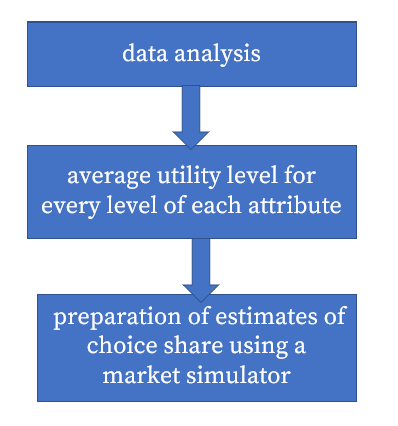

In [7]:
import pandas as pd
import numpy as np
rank_data = pd.read_excel("bike_conjoint.xlsx")
rank_data

,Rank,gear,type,susp,guards
0,1,Has gears,Mountain bike,Suspension,Mudguards
1,2,No gears,Mountain bike,Suspension,Mudguards
2,3,Has gears,Racing bike,Suspension,Mudguards
3,4,No gears,Racing bike,Suspension,Mudguards
4,5,Has gears,Mountain bike,No Suspension,Mudguards
5,6,No gears,Mountain bike,No Suspension,Mudguards
6,7,Has gears,Mountain bike,Suspension,No mudguards
7,8,No gears,Mountain bike,Suspension,No mudguards
8,9,Has gears,Racing bike,No Suspension,Mudguards
9,10,No gears,Racing bike,No Suspension,Mudguards


types of data:
1. long
2. wide
    


In [8]:
#introduce dummy variables 
conjoint_data = pd.get_dummies(rank_data,columns =['gear','type','susp','guards'])
conjoint_data

,Rank,gear_Has gears,gear_No gears,type_Mountain bike,type_Racing bike,susp_No Suspension,susp_Suspension,guards_Mudguards,guards_No mudguards
0,1,1,0,1,0,0,1,1,0
1,2,0,1,1,0,0,1,1,0
2,3,1,0,0,1,0,1,1,0
3,4,0,1,0,1,0,1,1,0
4,5,1,0,1,0,1,0,1,0
5,6,0,1,1,0,1,0,1,0
6,7,1,0,1,0,0,1,0,1
7,8,0,1,1,0,0,1,0,1
8,9,1,0,0,1,1,0,1,0
9,10,0,1,0,1,1,0,1,0


In [9]:
#renaming columns of dataframe
fullNames = {"Rank":"Rank","gear_Has gears": "geared","gear_No gears": "fixedgear","type_Mountain bike": "Mountainbike", "type_Racing bike": "RoadBike", "susp_No Suspension":"Hardtail",  "susp_Suspension":"Softtail", "guards_Mudguards":"Mudguarded", "guards_No mudguards":"openmudguard"}
          
conjoint_data=conjoint_data.rename(columns=fullNames)
conjoint_data

,Rank,geared,fixedgear,Mountainbike,RoadBike,Hardtail,Softtail,Mudguarded,openmudguard
0,1,1,0,1,0,0,1,1,0
1,2,0,1,1,0,0,1,1,0
2,3,1,0,0,1,0,1,1,0
3,4,0,1,0,1,0,1,1,0
4,5,1,0,1,0,1,0,1,0
5,6,0,1,1,0,1,0,1,0
6,7,1,0,1,0,0,1,0,1
7,8,0,1,1,0,0,1,0,1
8,9,1,0,0,1,1,0,1,0
9,10,0,1,0,1,1,0,1,0


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = conjoint_data[{ 'geared', 'fixedgear', 'Mountainbike', 'RoadBike','Hardtail', 'Softtail', 'Mudguarded', 'openmudguard'}]
X = sm.add_constant(X)
Y = conjoint_data.Rank
linearRegression = sm.OLS(Y, X).fit()
linearRegression.summary()

C:\Users\Convergytics\AppData\Local\Temp\ipykernel_25924\1090249029.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = conjoint_data[{ 'geared', 'fixedgear', 'Mountainbike', 'RoadBike','Hardtail', 'Softtail', 'Mudguarded', 'openmudguard'}]
C:\Users\Convergytics\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.8877
Date:                Fri, 28 Oct 2022   Prob (F-statistic):              0.506
Time:                        10:50:18   Log-Likelihood:                -34.172
No. Observations:                  15   AIC:                             78.34
Df Residuals:                      10   BIC:                             81.88
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5985      0.252      6.350      0.000       1.038       2.159
geared           0.2538      0.755      0.336      0.744      -1.429       1.936
openmudguard     0.5947      0.776      0.767      0.461      -1.134       2.323
Hardtail         2.0947      0.776      2.700      0.022       0.366       3.823
RoadBike         1.0947      0.776      1.411      0.189      -0.634       2.823
Softtail        -0.4962      0.755     -0.657      0.526      -2.179       1.186
Mountainbike     0.5038      0.755      0.667      0.520      -1.179       2.186
Mudguarded       1.0038      0.755      1.329      0.213      -0.679       2.686
fixedgear        1.3447      0.776      1.733      0.114      -0.384       3.073
==============================================================================
Omnibus:                        3.163   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                2.398
Skew:                           0.913   Prob(JB):                        0.302
Kurtosis:                       2.290   Cond. No.                     3.57e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

y=m1x1+m2x2+m3x3+...


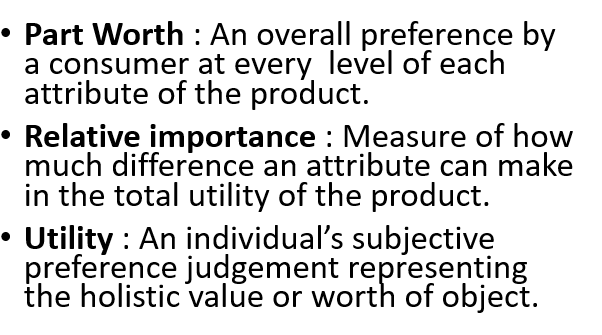

When multiple attributes come together to describe the total worth of the product concept, the utility values for the separate parts of the product (assigned to the multiple attributes) are part-worths.

# calculation 
1. Calculate the range of preference within each attribute for each individual. This is defined as the **maximum preference value within each attribute, minus the minimum for each individual**.
2. Calculate the **importance ratio of each attribute for each individual**. This is the range of preference for each attribute, divided by the total sum of all range of preferences for the individua
3. Calculate the average importance across respondents, through averaging the importance ratios across all respondents.


# Estimate Part worth 

**1.Plotting the part worth**

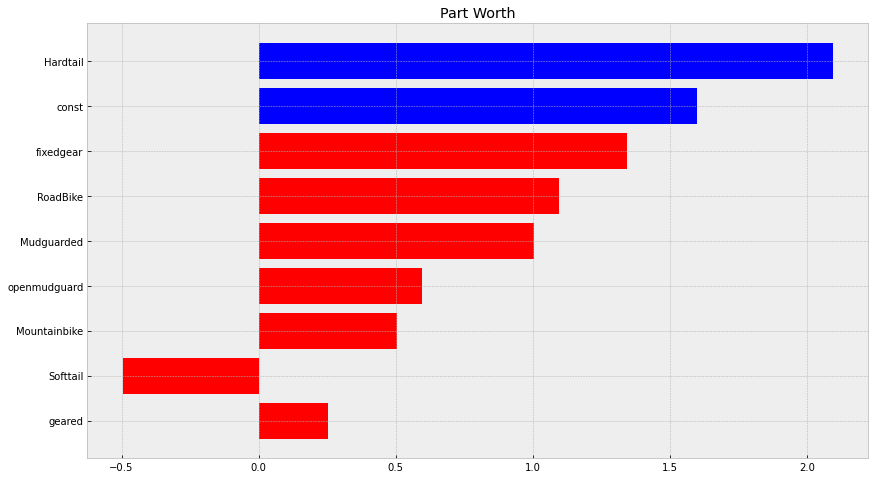

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')


df_res = pd.DataFrame({
    'param_name': linearRegression.params.keys()
    , 'param_w': linearRegression.params.values
    , 'pval': linearRegression.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

**Numerical calculation of part worth estimate**

assemble per attribute for every level of that attribute in dicionary

In [16]:
conjoint_attributes = ['geared', 'fixedgear', 'Mountainbike', 'RoadBike','Hardtail', 'Softtail', 'Mudguarded', 'openmudguard']
level_name = []
part_worth = []
part_worth_range = []
end = 1

print("vectors are:")
for item in conjoint_attributes:
    nlevels = len(list(set(conjoint_data[item])))
    level_name.append(list(set(conjoint_data[item])))
    begin = end
    end = begin + nlevels - 1
    new_part_worth = list(linearRegression.params[begin:end])
    print(linearRegression.params[begin:end])

vectors are:
geared    0.253788
dtype: float64
openmudguard    0.594697
dtype: float64
Hardtail    2.094697
dtype: float64
RoadBike    1.094697
dtype: float64
Softtail   -0.496212
dtype: float64
Mountainbike    0.503788
dtype: float64
Mudguarded    1.003788
dtype: float64
fixedgear    1.344697
dtype: float64


In [ ]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in linearRegression.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)
    
range_per_feature

# Relative importance

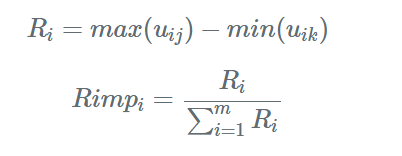

In [29]:
level_name = []
importance_per_feature = []
end = 1
relative_importance_per_feature= []

# importance per feature is range of coef in a feature
for item in conjoint_attributes:
    nlevels = len(list(set(conjoint_data[item])))
    level_name.append(list(set(conjoint_data[item])))
    begin = end
    end = begin + nlevels - 1
    new_part_worth = list(linearRegression.params[begin:end])
    new_part_worth.append((-1) * sum(new_part_worth))
    importance_per_feature.append(max(new_part_worth) - min(new_part_worth))

#relative importance per feature/normalized feature importance by dividing sum of importance for all features
for item in importance_per_feature:
    relative_importance_per_feature.append(round(100 * (item / sum(importance_per_feature)),2))

print("importance_per_feature",importance_per_feature,"\n")
print("relative_importance_per_feature",relative_importance_per_feature)

importance_per_feature [0.5075757575757578, 1.1893939393939394, 4.1893939393939394, 2.1893939393939412, 0.9924242424242409, 1.0075757575757587, 2.007575757575758, 2.689393939393941] 

relative_importance_per_feature [3.44, 8.05, 28.36, 14.82, 6.72, 6.82, 13.59, 18.21]


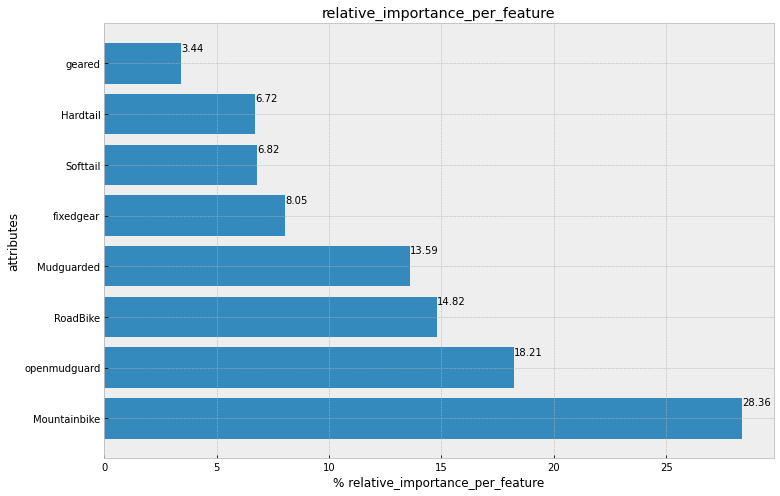

In [34]:
alt_data = pd.DataFrame({'attribute':conjoint_attributes,'relative_importance_per_feature':relative_importance_per_feature}).sort_values(by='relative_importance_per_feature', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attribute']))
plt.title('relative_importance_per_feature')
plt.barh(xbar, alt_data['relative_importance_per_feature'])
for i, v in enumerate(alt_data['relative_importance_per_feature']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative_importance_per_feature')
plt.yticks(xbar, alt_data['attribute'])
plt.show()

In [35]:
attribute_importance_df=pd.DataFrame({'attribute':conjoint_attributes,'attribute_importance':relative_importance_per_feature})
attribute_importance_df

,attribute,attribute_importance
0,geared,3.44
1,fixedgear,8.05
2,Mountainbike,28.36
3,RoadBike,14.82
4,Hardtail,6.72
5,Softtail,6.82
6,Mudguarded,13.59
7,openmudguard,18.21


# Level Parts Worth

In [36]:
index = 0 
for item in conjoint_attributes : 
    print('Level Part-Worths')
    for level in range(len(level_name[index])):
        print('       ',level_name[index][level], part_worth[index][level])
    index = index + 1


Level Part-Worths
        0 0.2537878787878789
        1 -0.2537878787878789
Level Part-Worths
        0 0.5946969696969697
        1 -0.5946969696969697
Level Part-Worths
        0 2.0946969696969697
        1 -2.0946969696969697
Level Part-Worths
        0 1.0946969696969706
        1 -1.0946969696969706
Level Part-Worths
        0 -0.49621212121212044
        1 0.49621212121212044
Level Part-Worths
        0 0.5037878787878793
        1 -0.5037878787878793
Level Part-Worths
        0 1.003787878787879
        1 -1.003787878787879
Level Part-Worths
        0 1.3446969696969704
        1 -1.3446969696969704
